# Aufgabe 1)

Schreiben Sie eine python-Funktion, welche mittels der Gauß-Chebyscheff-Quadratur für s Stufen
das Integral näherungsweise berechnet. Testen Sie Ihre Funktion an

$\int_{-1}^{1} \log_{10}(1-x)\frac{1}{\sqrt{1-x^2}}dx = -\pi \log_{10}(2)$

uns s = 10,100,1000,10000 Stufen und vergleichen Sie mit den Werten von (zusammengesetzen) Quadraturformel mit der gleichen Anzahl von Funktionsauswertungen



Disclaimer:

Presented the Second exercise, first one should be right tho

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

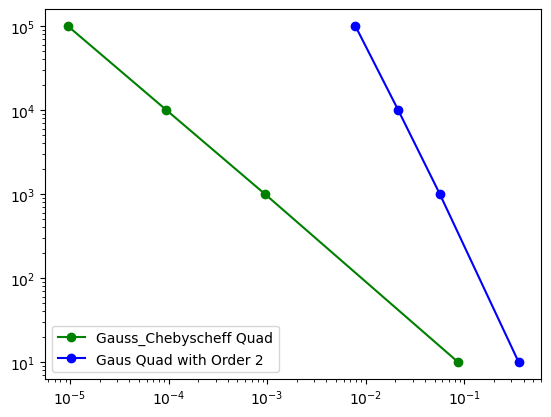

-1.0317968184405581
-0.9457136228881307


In [ ]:

def integrand(x):
    return np.log10(1-x)



# full integration function for normal quadrature rule

def full_integral(x):
    return (np.log10(1-x))/np.sqrt(1-x**2)

def GaussChebyshev(f,s):
    result = 0
    w = np.pi / s
    for j in range(1,s-1):
        x_k = np.cos(((2*j-1)/(2*s))*np.pi)
        result += w*f(x_k)
    return result

 
def gaus_quad_new(f,a,b,N,s): 
    """ 
    f: function
    a: int
    b: int
    N: int
    s: order int
    """
    x_vals = np.linspace(a,b,N)
    nodes,b_i =  np.polynomial.legendre.leggauss(s)
    
    c_i = []
    for node in nodes:
        c_i.append(0.5 * (1 + node))   

    h_vals = np.diff(x_vals)
    interval_result = []
    for j in range(0,N-1):
        first_sum = []
        for i in range(0,s):
            result= (b_i[i]/2) * f(x_vals[j]+c_i[i]*h_vals[j])
            first_sum.append(result)
        interval_result.append((h_vals[j]*np.sum(first_sum)))
    return np.sum(interval_result)

steps = [10, 1000, 10000, 100000]

exact_value = -np.pi * np.log10(2)

error_gc = np.zeros(len(steps))
error_gaus_quad = np.zeros(len(steps))

for i in range(0, len(steps)):
    error_gc[i] = abs(GaussChebyshev(integrand,int(steps[i])) - exact_value)
    error_gaus_quad[i] = abs(gaus_quad_new(full_integral,-1,1,int(steps[i]),2)-exact_value)
        


plt.plot(error_gc, steps, "-o",color="green", label="Gauss_Chebyscheff Quad")
plt.plot(error_gaus_quad, steps, "-o",color="blue", label="Gaus Quad with Order 2")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

print(GaussChebyshev(integrand,100))
print(exact_value)




# Aufgabe 2)

Verwenden Sie den ε-Algorithmus, um die Konvergenz der Folge

$S_n = \sum_{i=}^n \frac{(-1)^{i+1}}{i}$

zu beschleunigen. Berechnen Sie die Folgeglieder $S_n, \epsilon_2^{(n)}...$ und diskutieren Sie die Konvergenz gegen $\log(2)$


#### First collumn

$e_0^{n}$ = S_1, S_2 ...



In [ ]:
# This function defines one elemnt of the series
def S_1(n):
    i_n = np.arange(1, n + 1)
    return sum((-1)**(i_n + 1) / i_n)



def e_alg(nmax, Series):
    kmax = 2 * nmax + 1  
    res = np.zeros((kmax, kmax))  # Create a kmax x kmax matrix

    e_0 = np.zeros((kmax))
 
    # So with .shape we make an iterator from 0 - column lengh
    for col in range(res.shape[1]):
        for i in range(kmax-col):
            if col == 0:
                # because i = 0 we need to add + 1
                res[i,col] = Series(i + 1)
            elif col == 1:
                # For the first column we need e_0 
                res[i,col] = 1/(res[i+1,col-1]-res[i,col-1])
            else:
                res[i,col] = res[i+1,col-2]  + 1/(res[i+1,col-1] - res[i,col-1])
    return res

# Define n for the maximum number of iterations
n = 8

# Compute the result using epsilon algorithm
e_res = e_alg(n, S_1)



# Display the table
print("log(2):", np.log(2))

# Then we slice every second collumns

second_rows = e_res[:,::2]

print("--------------------------------- Epsilon Matrix ------------------------------------------------------")

for row in second_rows:
    print(" | ".join(f"{elem:.8f}" for elem in row))


i,j = np.indices(e_res)



log(2): 0.6931471805599453
--------------------------------- Epsilon Matrix ------------------------------------------------------
1.00000000 | 0.70000000 | 0.69333333 | 0.69315245 | 0.69314733 | 0.69314718 | 0.69314718 | 0.69314718 | 0.69314718
0.50000000 | 0.69047619 | 0.69308943 | 0.69314574 | 0.69314714 | 0.69314718 | 0.69314718 | 0.69314718 | 0.00000000
0.83333333 | 0.69444444 | 0.69316940 | 0.69314766 | 0.69314719 | 0.69314718 | 0.69314718 | 0.69314718 | 0.00000000
0.58333333 | 0.69242424 | 0.69313725 | 0.69314700 | 0.69314718 | 0.69314718 | 0.69314718 | 0.00000000 | 0.00000000
0.78333333 | 0.69358974 | 0.69315213 | 0.69314726 | 0.69314718 | 0.69314718 | 0.69314718 | 0.00000000 | 0.00000000
0.61666667 | 0.69285714 | 0.69314450 | 0.69314714 | 0.69314718 | 0.69314718 | 0.00000000 | 0.00000000 | 0.00000000
0.75952381 | 0.69334734 | 0.69314873 | 0.69314720 | 0.69314718 | 0.69314718 | 0.00000000 | 0.00000000 | 0.00000000
0.63452381 | 0.69300334 | 0.69314623 | 0.69314717 | 0.69314718 |

# Aufgabe 3

Berechnen Sie das Fresnel-Integral

$\int_0^\infty sin(x^2)dx = \frac{\sqrt{2\pi}}{4}$


Verwenden Sie eine Quadraturformel Ihrer Wahl, sowie den ε-Algorithmus. Berechnen Sie hierfür
zunächst die Integrale

In [55]:
import scipy.integrate as integrate

def S_int(n):
    # this function basically uses the scipy QF and then calculates the integral
    return integrate.quad(lambda x: np.sin(x**2), 0, np.sqrt(np.pi * n))[0]

# Now we Perfom our Epsilon algorithm

# Define parameters
tol = 1e-12 # Tolerance for convergence
it_max = 50  # Maximum number of iterations
true_int = np.sqrt(2*np.pi)/4
int_res = 0  # Initial result

qf_int = 0


it = 0  # Iteration counter


while abs(int_res - true_int) > tol and it < it_max:
    if np.isnan(int_res) or np.isnan(e_res[it,it]):
        print(f"NaN value for integral result in iteration {it}")
        break
    it += 1
    qf_int = S_int(it)
    e_res = e_alg(it, S_int)  
    int_res = e_res[it, it]  




print("Iterations:", it)
print("QF-Int", qf_int)
print("QF-Int-Error", abs(qf_int - true_int))
print("Final result for integral:", int_res)
print("Error:", abs(int_res - true_int))



Iterations: 10
QF-Int 0.5375180648320957
QF-Int-Error 0.08913900382565432
Final result for integral: 0.6266570686579572
Error: 2.071676163950542e-13
